<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/Part_of_Speech_Tagging_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part of Speech Tagging 101

[Add brief intro to POS tagging, what it is, various forms and applications]

In this tutorial, you will learn: 

*   POS Tagging with NLTK
*   POS Tagging with SpaCy
*   POS Visualization with NLTK, SpaCy and PosVisualizer
*   Other Applications of POS Tagging 

This workbook was created with the support of the following: 
CITATIONS

Before getting started, download all needed packages and corpora. 

In [47]:
##NLTK Packages and Corpora
import nltk
from nltk.corpus import brown
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from nltk.tokenize import word_tokenize
import os
from nltk.tree import Tree
from IPython.display import display
nltk.download('treebank')
nltk.download('punkt')
!pip install svgling

#spaCy Packages and Corpora
import spacy
from spacy import displacy
from spacy.matcher import Matcher

#PosTagVisualizer Packages
from yellowbrick.text import PosTagVisualizer

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##POS Tagging with NLTK 

The Natural Language Toolkit can be used to label all words in a sentence, text, or corpora according to their parts of speech. 

The part of speech tags used in NLTK tagging (`nltk.download('tagsets')`)
are from the **Penn Treebank Project**. [Here's a list of the 36 tags recognized by the Penn Treeback. ](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

POS tagging with NLTK is a relatively simple process. Here we'll `use nltk.pos_tag()` to tag text from the Brown corpus (including stop words) and print the first 10 tagged tokens.

In [2]:
##Get the first 100 words in the news category of the Brown corpus
news_text = brown.words(categories='news')
news_text_condensed = news_text[:100]

##Label the text with POS tags
brown_pos = nltk.pos_tag(news_text_condensed)
print(brown_pos[:10])

[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN')]


Not sure what the POS tags mean? Retrieve the list of tags and their meanings.

In [4]:
#Define all tags (outputs long list)
#nltk.help.upenn_tagset()

#Define single tag
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


It's likely you will want to perform POS tagging on your own text, file or corpus. Here is how to tag a sentence:

In [67]:
#Define a variable for the sentence you want to tag
sentence = "This is an example sentence."

#Tokenize sentence so POS tagger can identify each word 
tokenized_sent = nltk.sent_tokenize(sentence)

##Label each word in the tokenized sentence with a POS tag
sent_pos = [nltk.pos_tag(nltk.word_tokenize(word)) for word in tokenized_sent]
print(sent_pos)

[[('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('sentence', 'NN'), ('.', '.')]]


Here is how to perform part of speech tagging on a single file. You will first need to upload the file, convert it to a string and tokenize. 

In [26]:
##Google Colab: Choose file you want to upload (just choose one for now)
from google.colab import files
uploaded = files.upload()

##JupyterLab: Define file path on local machine (replace string with own path)
#fn = '/Users/megankane/Desktop/DreamLab22/Corpus/Argument1.txt'

Saving Argument1.txt to Argument1.txt


In [28]:
#Convert document into string
uploaded= str(uploaded)

#Convert document into word tokens and print first ten tokens
word_tokens = word_tokenize(uploaded)
print(word_tokens[:10])

['{', "'Argument1.txt", "'", ':', 'b', "''", '\\xef\\xbb\\xbf', 'At', 'the', 'end']


You may notice some strange characters in your file which will cause the POS tagger to misidentify tokens. Here is one way to clean any non-alphanumeric characters from your file. 

All cleaning decisions should be made carefully; if you are interested in punctuation, for example, the following would not be useful. Since we are interested in words (and numbers) only for NLTK part of speech tagging, all other characters can be removed

In [32]:
new_words= [word for word in word_tokens if word.isalnum()]
new_words[:10]

['b', 'At', 'the', 'end', 'of', '2006', 'over', 'million', 'people', 'were']

Now you can run the POS tagger on the tokenized file.

In [90]:
##Label each word in the tokenized file with a POS tag
uploaded_pos = [nltk.pos_tag(nltk.word_tokenize(word)) for word in new_words]
print(uploaded_pos)

[[('b', 'NN')], [('At', 'IN')], [('the', 'DT')], [('end', 'NN')], [('of', 'IN')], [('2006', 'CD')], [('over', 'IN')], [('million', 'CD')], [('people', 'NNS')], [('were', 'VBD')], [('living', 'NN')], [('with', 'IN')], [('HIV', 'NN')], [('globally', 'RB')], [('The', 'DT')], [('year', 'NN')], [('saw', 'NN')], [('over', 'IN')], [('million', 'CD')], [('new', 'JJ')], [('infections', 'NNS')], [('with', 'IN')], [('over', 'IN')], [('of', 'IN')], [('cases', 'NNS')], [('in', 'IN')], [('Africa', 'NNP')], [('the', 'DT')], [('epicenter', 'NN')], [('of', 'IN')], [('the', 'DT')], [('pandemic', 'NN')], [('Global', 'JJ')], [('On', 'IN')], [('a', 'DT')], [('continent', 'NN')], [('where', 'WRB')], [('of', 'IN')], [('the', 'DT')], [('population', 'NN')], [('lives', 'NNS')], [('on', 'IN')], [('less', 'RBR')], [('that', 'IN')], [('one', 'CD')], [('or', 'CC')], [('two', 'CD')], [('dollars', 'NNS')], [('a', 'DT')], [('day', 'NN')], [('the', 'DT')], [('disease', 'NN')], [('devastates', 'NNS')], [('poor', 'JJ')]

ADD SOME WAY TO EXPORT RESULTING FILE??

Here is how to perform POS tagging on a corpus. The basics are the same as above; instead of selecting one document from your machine, select multiple files. 

In [44]:
##Choose all the files you want to upload
from google.colab import files
uploaded_files = files.upload()

Saving Creative2.txt to Creative2.txt
Saving Creative3.txt to Creative3.txt
Saving Creative4.txt to Creative4.txt


Convert documents into strings and clean--CURRENTLY CONVERTS TO ONE LONG STRING INSTEAD OF SPLITTING INTO MULTIPLE FILES

In [ ]:
#Convert documents into string
uploaded_files= str(uploaded_files)

#Convert document into word tokens and print first ten tokens
word_tokens_c = word_tokenize(uploaded_files)
print(word_tokens_c[:10])

#Clean word tokens
new_words_c= [word for word in word_tokens_c if word.isalnum()]
new_words_c[:10]

In [ ]:
##Label each word in the tokenized file with a POS tag
uploaded_pos_c = [nltk.pos_tag(nltk.word_tokenize(word)) for word in new_words_c]
print(uploaded_pos_c)

ADD WAY TO EXPORT FOR ANALYSIS? 

##POS Tagging with SpaCy
POS tagging is one of several linguistic annotations spaCy generates to support analysis of texts' grammatical structure. SpaCy uses a trained pipeline and statistical models to assign POS classifications to tokens. [Here's a list of the 19 tags recognized by SpaCy's POS classifier.](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/#POS_Tagging_in_Spacy_Library)

It is a relatively simple process to print the part of speech corresponding to each word in a sample sentence. 

In [80]:
#Load nlp model and create doc object (contains original text tokens and results from nlp processing)
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is an example sentence.")

#Print part of speech tags for each word in doc
for token in doc:
    print(token.text, token.pos_)
  
output_str = f'{token.pos_}\n'

This PRON
is AUX
an DET
example NOUN
sentence NOUN
. PUNCT


Notice some differences from the NLTK tagset dictionary (NLTK tagging of the same sentence reproduced below).

`[('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('sentence', 'NN'), ('.', '.')]`

Both taggers recognize 'an' as a determiner, but all other words are assigned slightly different labels: 
*   "This" is either a determiner (NLTK) or a pronoun (spaCy). In the context of the sentence, the pronoun label is likely more accurate, since "this" takes the place of a whole noun phrase instead of qualifying a larger phrase.
*   "Is" is either a present-tense third-person verb with a singluar basis (NLTK) or an auxiliary verb (spaCy). In this sentence, is stands alone, so NLTK is more accurate if one's definition of auxiliary indicates it is a helping verb. 
*   "Example" and "sentence" are both tagged as nouns, but NLTK provides additional information--that the nouns are singular or mass objects. 
*   Periods are not recognized by NLTK, but tagged as punctuation in spaCy; this is true of other punctuation (*., (, ), ?*) which may influence cleaning decisions. 

As noted above, SpaCy can returns additional information about the POS tags and can perform a variety of other linguistic annotations. For example, spaCy also generates "fine-grained" POS tags through the ".tag_" attribute and explanation for each feature.


In [81]:
#Print POS tags, fine-grained part of speech tags and explanation for each feature, separated by spaces for improved readability
for token in doc:
    print(f'{token.text:{12}} {token.pos_:{10}} {token.tag_:{8}} {spacy.explain(token.tag_)}')

This         PRON       DT       determiner
is           AUX        VBZ      verb, 3rd person singular present
an           DET        DT       determiner
example      NOUN       NN       noun, singular or mass
sentence     NOUN       NN       noun, singular or mass
.            PUNCT      .        punctuation mark, sentence closer


The discrepencies between NLTK and spaCy tags have been resolved here, though may persist in longer text as the fine-grained tagger has 56 tags; a list can be found [here](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/#POS_Tagging_in_Spacy_Library).

From this very brief example, one tagger is not always more accurate than another, but spaCy may be preferred if wanting multiple layers of POS information.  Deciding between NLTK and spaCy may also be guided by goals of analysis. NLTK modules are transparent and easy to run. SpaCy's processing is somewhat more abstract, but it is fast and can generate a variety of linguistic annotations in one go. [Here's even more information about the differences between spaCy and NLTK. ](https://www.activestate.com/blog/natural-language-processing-nltk-vs-spacy/#:~:text=There's%20a%20real%20philosophical%20difference,you%20get%20specific%20tasks%20done.)

Here is how to run spaCy POS analysis on a single text file. 

In [86]:
##Choose file you want to upload (just choose one for now)
from google.colab import files
uploaded_spaCy = files.upload()

Saving Argument1.txt to Argument1 (4).txt


In [87]:
#Convert document into string
uploaded_spaCy = str(uploaded_spaCy)

#Clean document of all non-alnum characters--DON'T USE if wanting to keep punctuation, need solution that replaces all chars EXCEPT those recognized by spaCy
#uploaded_spaCy = [word for word in word_tokens if word.isalnum()]
#uploaded_spaCy [:10]

#Convert string to doc object spaCy can analyze
doc_file = nlp(uploaded_spaCy)

#Print POS tags, fine-grained part of speech tags and explanation for each feature, separated by spaces for improved readability
for token in doc_file:
    print(f'{token.text:{12}} {token.pos_:{10}} {token.tag_:{8}} {spacy.explain(token.tag_)}')

{            PUNCT      -LRB-    left round bracket
'            PUNCT      ``       opening quotation mark
Argument1.txt NOUN       NN       noun, singular or mass
'            PUNCT      ''       closing quotation mark
:            PUNCT      :        punctuation mark, colon or ellipsis
b"\xef\xbb\xbf VERB       VBZ      verb, 3rd person singular present
             SPACE      _SP      whitespace
At           ADP        IN       conjunction, subordinating or preposition
the          DET        DT       determiner
end          NOUN       NN       noun, singular or mass
of           ADP        IN       conjunction, subordinating or preposition
2006         NUM        CD       cardinal number
,            PUNCT      ,        punctuation mark, comma
over         ADP        IN       conjunction, subordinating or preposition
39.5         NUM        CD       cardinal number
million      NUM        CD       cardinal number
people       NOUN       NNS      noun, plural
were         AUX      

Add way to export POS output here/below as well?? 

Here is how to run spacy POS analysis on multiple text files. 

In [84]:
#WILL ADD ONCE UPLOAD PROCESS IS FIXED FOR NLTK ABOVE 

##POS Visualization 

Once POS tags have been gathered, visualization is a useful next step to better understand what information has been gathered and to conduct some preliminary analysis. SpaCy, NLTK, and the POS Visualization tool are three ways to visualize parts of speech in meaningful ways. 

###NLTK POS Visualization 
Meaningful POS visualization in NLTK is done through a process called **chunking.** When a text is "chunked," it is separated into grammatical units which contain a head and (optionally) additional words and modifiers. Examples of chunks include noun groups and verb groups. If you are interested in particular chunks, these can be output and visualized to get a better understanding of their distribution within a text. 

Below, a simple grammar for a noun phrase (NP) chunker is defined with a single regular-expression rule. This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). 

Learn more about defining a chunk grammar [here](https://www.nltk.org/book_1ed/ch07.html). 

In [69]:
##Define a chunk grammar
grammar = "NP: {<DT>?<JJ>*<NN>}"

#Create a parser to identify chunks in a text based on the grammar defined
chunk_parser = nltk.RegexpParser(grammar)

#Run the chunk parser on our single sentence
tree = chunk_parser.parse(brown_pos)

We can visualize the chunks using draw(). We first need to create a virtual environment and then display the visualized chunks. 

In [77]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0. 

%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.16).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Now we can visualize the text in terms of its part of speech tags, delineated as grammatical chunks. Click the resulting images to enlarge. 

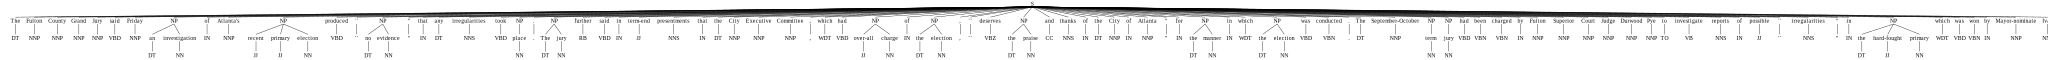

In [76]:
display(tree)

###SpaCy POS Visualization 

Similar to NLTK, parts of speech and the grammatical relationships between words can be visualized in spaCy using the displaCy visualizer. In the visualization below, each word is denoted by its part of speech and the arrows denote the relationships between words (dependencies). 

In [78]:
#Create dependency visualizer
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

###POS Visualization with PosTagVisualizer

The POS visualizer creates a bar chart to visualize the relative proportions of different parts-of-speech in a corpus. It works with corpora tagged by either via NLTK or spaCy. [Learn more about the visualizer here. ](https://www.scikit-yb.org/en/latest/api/text/postag.html)

First, let's visualize the condensed news text from the Brown corpus defined above. The PosTagVisualizer can be used with untagged text by using the "parse" keyword and specifying NLTK as the dictionary of use.

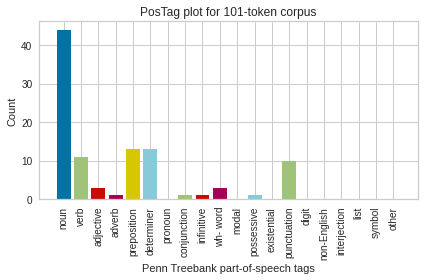

In [79]:
# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(parser='nltk')
viz.fit(news_text_condensed)
viz.show()

We can also tag and visualize text using the universal dependency tags from spaCy by specifying spaCy as the parsing dictionary. Let's try it on the file we have prepared as a spaCy doc object. **NOT SURE WHY THIS ISN'T WORKING!!**

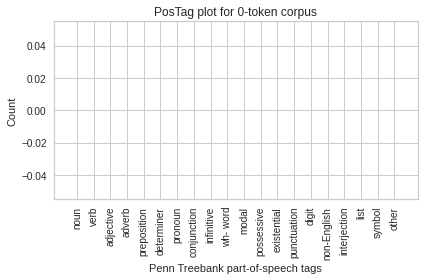

In [88]:
viz = PosTagVisualizer(parser='spacy')
viz.fit(doc_file)
viz.show()

PosTagVisualizer also works with texts already tagged by NLTK or spaCy. Here's an example of text tagged via NLTK. **NOT WORKING YET EITHER**

In [91]:
# Create the visualizer, fit, score, and show it 
viz = PosTagVisualizer()
viz.fit(uploaded_pos)
viz.show()

ValueError: ignored

The PosTagVisualizer can also be used with text tagged using spaCy's universal dependency framework by specifying the tagset keyword as “universal." **NEEDS WORK**

In [ ]:
# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(tagset="universal")
viz.fit(output_str)
viz.show()

##Other Applications of POS Tagging

Why perform POS tagging? For many it is a useful pre-processing step prior to more advanced NLP like named entity recognition. For example, POS taggers can removeany unrecognized words like "etc" and "i.e." since those labeled with the POS tag "X." Below, all words tagged as "X" are identified and then removed.

In [94]:
# Raw text document
raw_text="""Apple, an American multinational technology company that specializes in consumer electronics, software, online services, etc. is looking at buying U.K. startup for $1 billion i.e. a very good indicator of the company's value"""

# Creating a spacy object
raw_doc=nlp(raw_text)

# Checking if POS tag is X and printing them
print('The junk values are..')
for token in raw_doc:
  if token.pos_=='X':
    print(token.text)

print('After removing junk')
# Removing the tokens whose POS tag is junk.
clean_doc=[token for token in raw_doc if not token.pos_=='X']
print(clean_doc)

The junk values are..
etc
.
i.e.
After removing junk
[Apple, ,, an, American, multinational, technology, company, that, specializes, in, consumer, electronics, ,, software, ,, online, services, ,, is, looking, at, buying, U.K., startup, for, $, 1, billion, a, very, good, indicator, of, the, company, 's, value]


If interested in distributions of specific POS tags or patterns of tags (along with other linguistic attributes), these can also be identified using the Matcher.

In [96]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Write a pattern that matches a form of "buy" plus proper noun
pattern = [{"LEMMA": 'buy'}, {"POS": 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("NEW_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)


Total matches found: 1
Match found: buying U.K.


INCLUDE A MODULE TALKING ABOUT HOW POS TAGGING CAN BE USED FOR DISAMBIGUATION OF KEYWORDS

You may also be interested in determining whether POS tags can meaningfully separate documents based on specific classifications (i.e. author, genre). This can be determined by running Most Distinctive Word (MDW) analysis, wherein most distinctive parts of speech (rather than words) are determined across subsets of interest in a corpus. 